<a href="https://colab.research.google.com/github/IA2021UR/practica-9-joferne/blob/main/practica9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 9 Parte 2: Análisis de sentimientos

El análisis de sentimientos es un problema de procesado de lenguaje natural donde se pretende conocer la intención de un texto. En esta práctica vamos a ver cómo predecir el sentimiento, positivo o negativo, de una valoracion de una película.

En esta ocasión vamos a utilizar la librería de deep learning [Keras](https://keras.io/).


En esta práctica es importante que actives el uso de GPU. Para ello ve al menú Edit -> Notebook settings y en la opción Hardware accelerator selecciona la opción de GPU.


## Dataset

El dataset usado en esta sesión es el dataset [IMDB](http://ai.stanford.edu/~amaas/data/sentiment/). Dicho dataset contiene 25000 valoraciones (positivas y negativas) para entrenar, y 25000 valoraciones  para testear. El objetivo es ser capaz de determinar si una valoración de una película es positiva o negativa. 

Keras proporciona acceso directo al dataset IMDB en un formato listo para ser usado por las redes neuronales, lo que evita tener que descargarlo y procesarlo. La función ``imdb.load_data()`` permite cargar el dataset donde las palabras han sido reemplazadas por enteros que indican la popularidad (número de apariciones)  de una palabra en el dataset. 

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import imdb
from matplotlib import pyplot as plt
%matplotlib inline

(X_train,y_train), (X_test,y_test) = imdb.load_data()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

A continuación mostramos la forma del dataset

In [ ]:
print("Datos entrenamiento: ")
print(X_train.shape)
print(y_train.shape)

print("Datos test: ")
print(X_test.shape)
print(y_test.shape)

Datos entrenamiento: 
(25000,)
(25000,)
Datos test: 
(25000,)
(25000,)


Podemos también mostrar que aspecto tienen los elementos de nuestro dataset. 

In [ ]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

A partir de la instrucción anterior podemos ver que los elementos de nuestro dataset se representan mediante una lista de enteros, donde cada entero está asociado a una palabra. Para restaurar el mensaje original podemos ejecutar el siguiente comando.

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

Podemos también mostrar el número de clases (veremos que nos devuelve dos clases, el 0 representa una valoración negativa y el 1 una valoración positiva)

In [ ]:
print("Clases: ")
print(np.unique(y_train))

Clases: 
[0 1]


También podemos ver el número total de palabras del dataset. 

In [ ]:
print("Número de palabras: ")
print(len(np.unique(np.hstack(X_train))))

Número de palabras: 
88585


Finalmente, podemos ver la longitud media de las valoraciones. 

Longitud media: 
Media 238.71 palabras (176.493674)


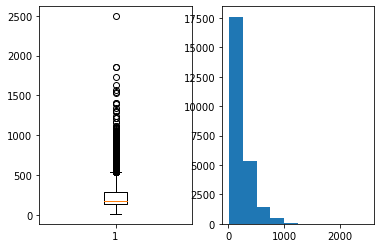

In [ ]:
print("Longitud media: ")
result = [len(x) for x in X_train]
print("Media %.2f palabras (%f)" % (np.mean(result),np.std(result)))
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

##### Ejercicio
A partir de los diagramas anteriores, ¿qué puedes decir del tamaño de las valoraciones? ¿Cuál sería el tamaño de la valoración más larga (para esta pregunta puedes ejecutar alguna instrucción adicional)?

In [ ]:
np.mean(result)

238.71364

In [ ]:
np.max(result)

2494

La media y mayor parte de las valoraciones se encuentran en torno a 239 palabras. El tamaño de valoración más larga es de 2494 palabras.

## Word embeddings

Como ya hemos visto, uno de los grandes avances más recientes en el área del procesamiento de lenguaje natural son los *word embeddings*. Los *word embeddings* son una técnica donde las palabras se codifican como vectores de reales en un espacio de dimensión alta, donde las similaridad entre palabras se traduce en cercanía de los vectores. Esto s muy útil ya que al trabajar con redes neuronales se requiere una conversión de las palabras a números. 

Por el momento no vamos a usar ningún word embedding de los vistos con anterioridad, sino que vamos aprenderlos directamente a partir de nuestros datos. Keras proporciona una manera sencilla de convertir representaciones de palabras mediante enteros positios a un word embedding mediante una capa de ``Embedding``. Esta capa toma argumentos que definen la asociación de palabras a vectores. Estos argumentos incluyen el número máximo de palabras esperadas, también conocido como el tamaño del vocabulario. Esta capa también permite especificar la dimensionalidad de la representación.

Queremos usar una representación para nuestro dataset. Digamos que estamos interesados en las 5000 palabras más usadas del dataset. Por lo tanto, nuestro vocabulario tendrá 5000 elementos. También podemos elegir usar un vector de dimensión 32 para representar cada una de las palabras. Finalmente, podemos fijar que la longitud máxima de las valoraciones sea de 500 palabras, truncando aquellas que son más largas y añadiendo ceros a las que son más cortas. Vamos a obtener de nuevo nuestro dataset teniendo esto en cuenta. También vamos a definir un conjunto de validación usando el 20% del conjunto de entrenamiento. 

In [ ]:
from sklearn.model_selection import train_test_split
(X_train,y_train), (X_test,y_test) = imdb.load_data(num_words=5000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.2,
                                                    random_state=15)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Podemos ahora truncar o completar cada una de las valoraciones para que contenga 500 palabras.

In [ ]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

## Modelo Red Neuronal Simple

Vamos a construir varios modelos para nuestro dataset. Comenzaremos con una red neuronal multicapa con una única capa oculta. La innovación será la capa de word embedding que muestra cómo se pueden conseguir buenos resultados con un modelo tan simple. 

Comenzamos importando las funciones necesarias e inicializando una semilla para obtener resultados consistentes. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

seed = 15
np.random.seed(seed)

A continuación creamos nuestro modelo.

In [ ]:
top_words = 5000
def create_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Flatten())
  model.add(Dense(250,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model1 = create_model()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


Vamos ahora a entrenar el modelo y a mostrar su curva de entrenamiento y validación. 

In [ ]:
history = model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=128,verbose=1)

Epoch 1/10
157/157 [==============================] - 2s 13ms/step - loss: 0.6829 - accuracy: 0.5711 - val_loss: 0.3325 - val_accuracy: 0.8674
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 0.2301 - accuracy: 0.9086 - val_loss: 0.2995 - val_accuracy: 0.8744
Epoch 3/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0922 - accuracy: 0.9731 - val_loss: 0.3601 - val_accuracy: 0.8668
Epoch 4/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0225 - accuracy: 0.9966 - val_loss: 0.4838 - val_accuracy: 0.8580
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0048 - accuracy: 0.9997 - val_loss: 0.5189 - val_accuracy: 0.8672
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5570 - val_accuracy: 0.8666
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 5.7527e-04 - accuracy: 1.0000 - val_loss: 0.5905 - val_accuracy: 0.

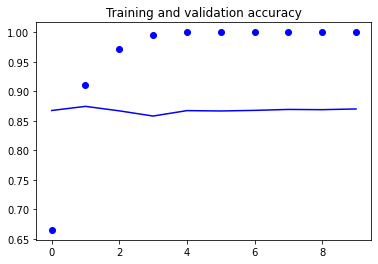

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.show()

##### Ejercicio
A partir de las gráficas anteriores ¿qué problema tiene nuestro modelo?

Respuesta: tenemos un sobreajuste del modelo.

Para evitar el problema anterior, vamos a entrenar de nuevo nuestra red, pero sólo 2 épocas. 

In [ ]:
model2 = create_model()
model2.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)               4000250   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
157/157 [==============================] - 2s 12ms/step - loss: 0.6216 - accuracy: 0.6266 - val_loss: 0.2994 - val_accuracy: 0.8786
Epoch 2/2
157/157 [==============================] - 2s 12ms/step - loss: 0.1874 - accuracy: 0.

Por último, evaluamos nuestro modelo en el conjunto de test. 

In [ ]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.73%


Podemos también evaluar el modelo que tenía el problema y podemos ver que la accuracy es peor que la que hemos obtenido con el otro modelo, a pesar de haberlo entrenado por menos tiempo. 

In [ ]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.75%


## Red neuronal convolucional de una dimensión

Las redes neuronales convolucionales fueron creadas para tener en cuenta la estructura espacial de los datos en imágenes siendo robustas a cambios en la posición y orientación de los objetos. Este mismo principio se puede aplicar a secuencias como son las secuencias 1-dimensionales de palabras de una valoración de película.  Vamos a utilizar dicha propiedad en nuestro problema. 

Comenzamos cargando las librerías necesarias para trabajar con redes convolucionales 1-dimensionales. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding

Definimos el modelo.

In [ ]:
def create_cnn_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Convolution1D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(250,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model3 = create_cnn_model()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

Entrenamos este nuevo modelo. 

In [ ]:
model3.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

Epoch 1/2
157/157 [==============================] - 3s 14ms/step - loss: 0.6195 - accuracy: 0.6054 - val_loss: 0.2832 - val_accuracy: 0.8820
Epoch 2/2
157/157 [==============================] - 2s 13ms/step - loss: 0.2146 - accuracy: 0.9162 - val_loss: 0.2730 - val_accuracy: 0.8888


Y evaluamos su precisión. 

In [ ]:
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.47%


Como podemos ver, este modelo mejora los resultados obtenidos con el modelo anterior. 

## LSTM

Vamos a crear ahora una pequeña red LSTM. Como en casos anteriores comenzamos cargando las librerías necesarias. 

In [ ]:
from keras.layers import LSTM

Definimos el modelo. 

In [ ]:
def create_lstm_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(LSTM(100))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model4 = create_lstm_model()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


Entrenamos el modelo. 

In [ ]:
model4.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

Epoch 1/2
157/157 [==============================] - 8s 42ms/step - loss: 0.6544 - accuracy: 0.5877 - val_loss: 0.4109 - val_accuracy: 0.8134
Epoch 2/2
157/157 [==============================] - 6s 39ms/step - loss: 0.3301 - accuracy: 0.8630 - val_loss: 0.3246 - val_accuracy: 0.8698


Y por último lo evaluamos contra el conjunto de test. 

In [ ]:
scores = model4.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.80%


## LSTM con Dropout

Uno de los problemas que tienen todas las redes que hemos definido hasta ahora es que tienden a sobreajustarse muy rápido. Para evitar dicho problema se puede utilizar la técnica de Dropout. 

Para ello definimos el siguiente modelo. 


In [ ]:
from keras.layers import Dropout

In [ ]:
def create_lstm_dropout_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Dropout(0.2))
  model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model5 = create_lstm_dropout_model()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


##### Ejercicio

¿Por cuántas épocas puedes entrenar el nuevo modelo hasta que aparece el sobreajuste?

In [ ]:
model5.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5,batch_size=128,verbose=1)

Epoch 1/5
157/157 [==============================] - 258s 2s/step - loss: 0.6481 - accuracy: 0.5990 - val_loss: 0.3759 - val_accuracy: 0.8382
Epoch 2/5
157/157 [==============================] - 254s 2s/step - loss: 0.3484 - accuracy: 0.8561 - val_loss: 0.3540 - val_accuracy: 0.8642
Epoch 3/5
157/157 [==============================] - 253s 2s/step - loss: 0.2818 - accuracy: 0.8906 - val_loss: 0.2967 - val_accuracy: 0.8850
Epoch 4/5
157/157 [==============================] - 254s 2s/step - loss: 0.2355 - accuracy: 0.9123 - val_loss: 0.3159 - val_accuracy: 0.8746
Epoch 5/5
157/157 [==============================] - 251s 2s/step - loss: 0.2139 - accuracy: 0.9190 - val_loss: 0.3128 - val_accuracy: 0.8740


Con 3 épocas hasta que aparece el sobreajuste.

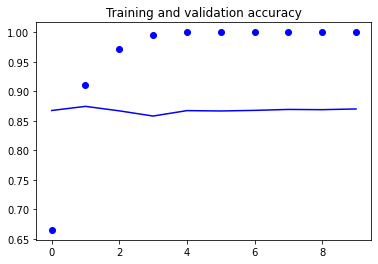

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.show()

##### Ejercicio
¿Qué accuracy consigues obtener con este nuevo modelo?

In [ ]:
scores = model5.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.76%


Un 86.76% de precisión.


## Predicciones propias

Una vez construido nuestro modelo nos interesa probarlo con nuestras propias valoraciones. Para ello debemos convertir la frase a un formato que pueda alimentar a la red como se muestra a continuación. 

In [ ]:
review = "i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely awful"
review = review.split(" ")
review = [word_index[w] for w in review]
review = sequence.pad_sequences([review], maxlen=max_words)

Y hacer la predicción con uno de nuestros modelos. 

In [ ]:
model4.predict(review)

array([[0.16137785]], dtype=float32)

## Ejercicio obligatorio

El problema que hemos visto es un problema de clasificación binaria, existe otro dataset, [Reuters](https://keras.io/api/datasets/reuters/), para la clasificación multiclase (dicho dataset está disponible en [Keras](https://keras.io/datasets/#reuters-newswire-topics-classification)). El ejercicio consite en entrenar un modelo (utilizando las mismas ideas presentadas en este notebook) para dicho problema. Ten en cuenta que con dicho dataset no podrás utilizar como función de pérdida ``binary_crossentropy`` (preparada para problemas binarios) sino que deberás usar la función de pérdida ``categorical_crossentropy``. Añade a continuación todas las celdas que necesites. 

In [1]:
%tensorflow_version 1.x
import numpy as np
from keras.datasets import reuters
from matplotlib import pyplot as plt
%matplotlib inline

(X_train,y_train), (X_test,y_test) = reuters.load_data()

TensorFlow 1.x selected.


Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Mostramos la forma del dataset y el aspecto de un elemento.

In [3]:
print("Datos entrenamiento: ")
print(X_train.shape)
print(y_train.shape)

print("Datos test: ")
print(X_test.shape)
print(y_test.shape)

X_train[0]

Datos entrenamiento: 
(8982,)
(8982,)
Datos test: 
(2246,)
(2246,)


[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])

557056/550378 [==============================] - 0s 0us/step


'? mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Mostramos algunos datos.

Clases: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Número de palabras: 
28138
Longitud media: 
Media 145.54 palabras (145.814130)


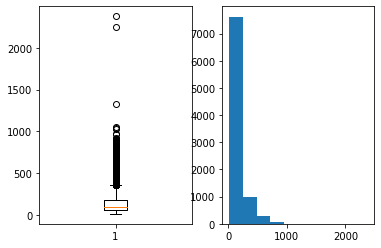

145.5398574927633
2376


In [6]:
print("Clases: ")
print(np.unique(y_train))

print("Número de palabras: ")
print(len(np.unique(np.hstack(X_train))))

print("Longitud media: ")
result = [len(x) for x in X_train]
print("Media %.2f palabras (%f)" % (np.mean(result),np.std(result)))
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

print(np.mean(result))
print(np.max(result))

Hacemos la división.

In [8]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.utils import to_categorical


(X_train,y_train), (X_test,y_test) = reuters.load_data(num_words=5000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.2,
                                                    random_state=15)

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Construimos los modelos.

1. Red neuronal simple. Cambiamos la última capa de 1 a 46 salidas.

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

seed = 15
np.random.seed(seed)

top_words = 5000
def create_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Flatten())
  model.add(Dense(250,activation='relu'))
  model.add(Dense(46,activation='sigmoid'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model1 = create_model()

history = model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=128,verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_6 (Dense)              (None, 46)                11546     
Total params: 4,171,796
Trainable params: 4,171,796
Non-trainable params: 0
_________________________________________________________________
None

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 2s 312us/step - loss: 2.5738 - accuracy: 0.3467 - val_loss: 2.2069 - val_accuracy: 0.3417
Epoch 2/10
7185/7185 [====================

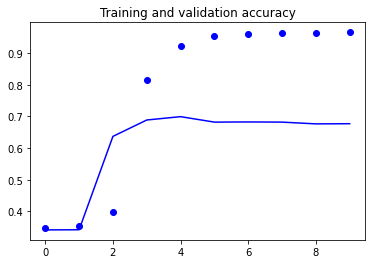

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.show()

Bajamos el número de épocas a 4.

In [22]:
model2 = create_model()
history = model2.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=4,batch_size=128,verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_8 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 250)               4000250   
_________________________________________________________________
dense_16 (Dense)             (None, 46)                11546     
Total params: 4,171,796
Trainable params: 4,171,796
Non-trainable params: 0
_________________________________________________________________
None
Train on 7185 samples, validate on 1797 samples
Epoch 1/4
7185/7185 [==============================] - 1s 85us/step - loss: 2.5950 - accuracy: 0.3485 - val_loss: 2.2257 - val_accuracy: 0.3417
Epoch 2/4
7185/7185 [========================

Le ajustamos aproximadamente el número de épocas a 23 para evitar el subajuste.

In [23]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 66.21%


In [24]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 66.96%


Hemos logrado subir 0.7 puntos.

2. Red convolucional. Cambiamos de nuevo la última capa de 1 a 46 salidas.

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding

def create_cnn_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Convolution1D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(250,activation='relu'))
  model.add(Dense(46,activation='sigmoid'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model3 = create_cnn_model()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 8000)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_20 (Dense)             (None, 46)                11546     
Total params: 2,174,900
Trainable params: 2,174,900
Non-trainable params: 0
___________________________________________

In [31]:
history = model3.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=128,verbose=1)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 0s 63us/step - loss: 0.4446 - accuracy: 0.8871 - val_loss: 1.5916 - val_accuracy: 0.6678
Epoch 2/10
7185/7185 [==============================] - 0s 54us/step - loss: 0.3419 - accuracy: 0.9177 - val_loss: 1.6066 - val_accuracy: 0.6923
Epoch 3/10
7185/7185 [==============================] - 0s 58us/step - loss: 0.2795 - accuracy: 0.9318 - val_loss: 1.7146 - val_accuracy: 0.6817
Epoch 4/10
7185/7185 [==============================] - 0s 55us/step - loss: 0.2197 - accuracy: 0.9473 - val_loss: 1.7944 - val_accuracy: 0.6834
Epoch 5/10
7185/7185 [==============================] - 0s 55us/step - loss: 0.1832 - accuracy: 0.9537 - val_loss: 1.9528 - val_accuracy: 0.6706
Epoch 6/10
7185/7185 [==============================] - 0s 54us/step - loss: 0.1719 - accuracy: 0.9589 - val_loss: 1.9176 - val_accuracy: 0.6850
Epoch 7/10
7185/7185 [==============================] - 0s 54us/step - loss: 0.162

In [33]:
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 66.96%


Obtenemos una precisión un poco mejor que antes.

3. LSTM.

In [34]:
from keras.layers import LSTM

def create_lstm_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(LSTM(100))
  model.add(Dense(46,activation='sigmoid'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model4 = create_lstm_model()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_21 (Dense)             (None, 46)                4646      
Total params: 217,846
Trainable params: 217,846
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model4.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

Train on 7185 samples, validate on 1797 samples
Epoch 1/2
7185/7185 [==============================] - 24s 3ms/step - loss: 3.0800 - accuracy: 0.3467 - val_loss: 2.4793 - val_accuracy: 0.3417
Epoch 2/2
7185/7185 [==============================] - 23s 3ms/step - loss: 2.4413 - accuracy: 0.3542 - val_loss: 2.4056 - val_accuracy: 0.3417


In [36]:
scores = model4.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 36.20%


Funciona francamente mal y el tiempo de entrenamiento ha sido superior, aunque no aporto una prueba de ello.

4. LSTM Dropout.

In [39]:
from keras.layers import Dropout

def create_lstm_dropout_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Dropout(0.2))
  model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
  model.add(Dense(46,activation='sigmoid'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model5 = create_lstm_dropout_model()

model5.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5,batch_size=128,verbose=1)

scores = model5.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_24 (Dense)             (None, 46)                4646      
Total params: 217,846
Trainable params: 217,846
Non-trainable params: 0
_________________________________________________________________
None
Train on 7185 samples, validate on 1797 samples
Epoch 1/5
7185/7185 [==============================] - 26s 4ms/step - loss: 3.0381 - accuracy: 0.3438 - val_loss: 2.4281 - val_accuracy: 0.3417
Epoch 2/5
7185/7185 [===========================

## Ejercicio opcional 

A lo largo de la práctica los embeddings se han aprendido al entrenar la propia red. El ejercicio opcional consiste en utilizar embeddings preentrenados y utilizarlos para construir distintos modelos (ten en cuenta que deberás cambiar la estructura de las redes). Para esto puedes seguir el siguiente [tutorial de Keras](https://keras.io/examples/nlp/pretrained_word_embeddings/).

Recuerda guardar tus cambios en tu repositorio de GitHub usando la opción "Save in GitHub" del menú File.